In [1]:
import gzip
import pickle 
import mplhep as hep
hep.style.use("CMS")
import matplotlib
matplotlib.rc('font', size=15)
import numpy as np
import torch 
import dgl
import pandas as pd
import numpy as np
import plotly.express as px
sys.path.append("/afs/cern.ch/work/m/mgarciam/private/mlpf/")
from sklearn.cluster import DBSCAN
from torch_scatter import scatter_max, scatter_add, scatter_mean
from src.layers.inference_oc import get_clustering, obtain_intersection_values
from scipy.optimize import linear_sum_assignment
import numpy as np
import matplotlib.pyplot as plt

Text(1, 0, 'E true (GeV)')

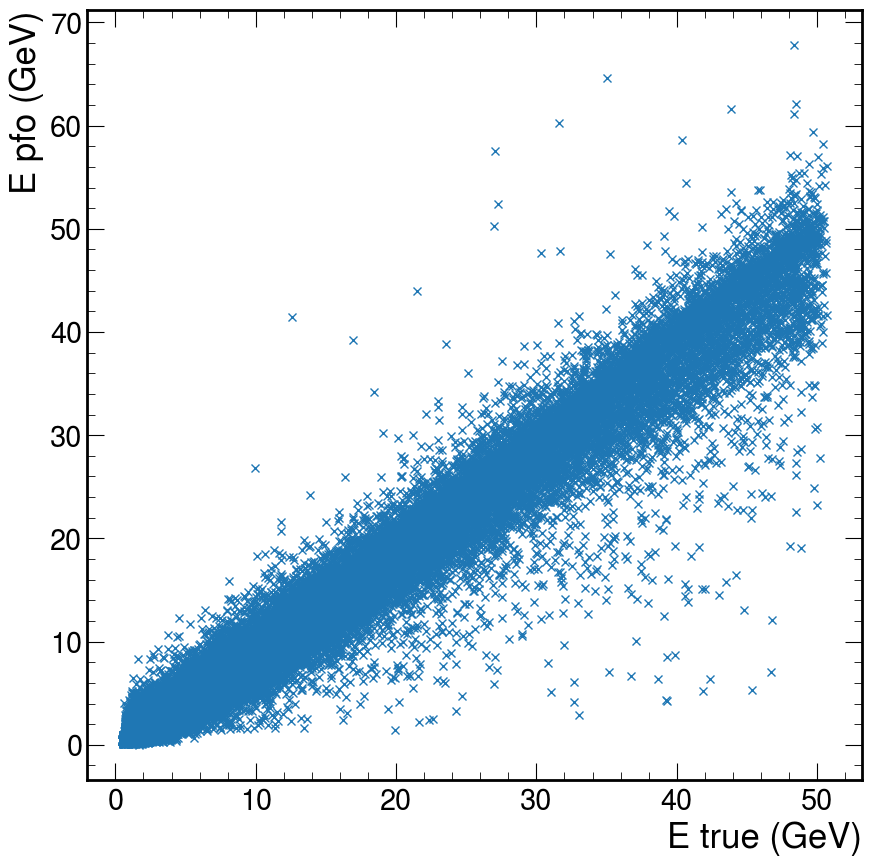

In [6]:
plt.plot(matched_pandora["true_showers_E"],matched_pandora["pred_showers_E"], 'x')
plt.ylabel("E pfo (GeV)")
plt.xlabel("E true (GeV)")

Text(1, 0, 'E true (GeV)')

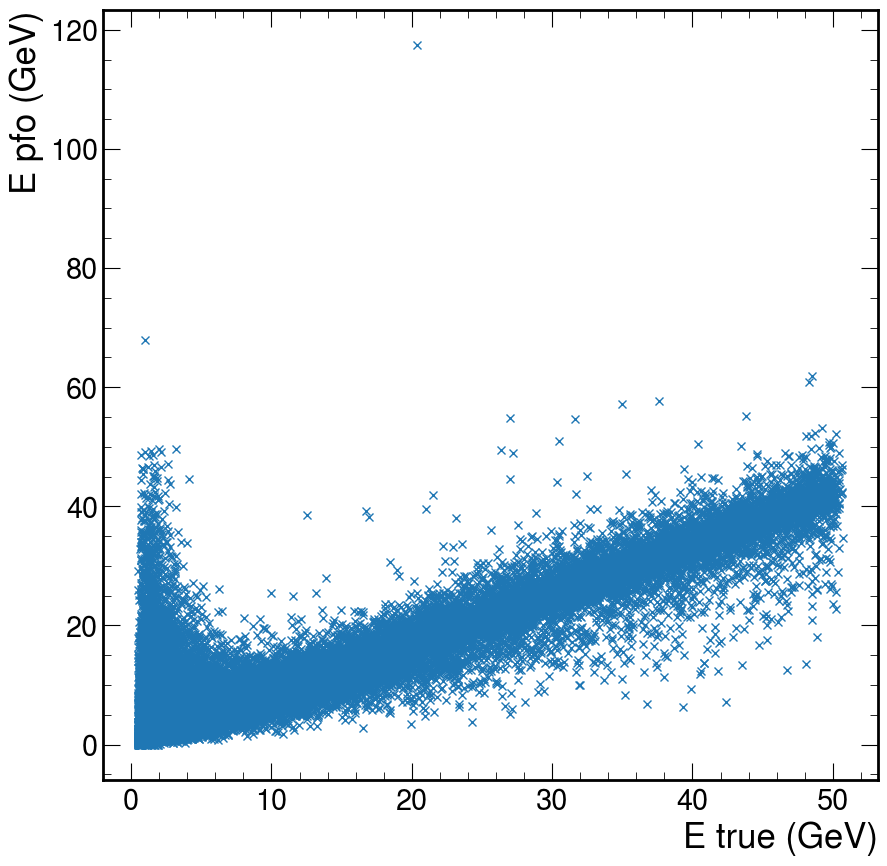

In [4]:
plt.plot(matched_pandora["true_showers_E"],matched_pandora["pandora_calibrated_pfo"], 'x')
plt.ylabel("E pfo (GeV)")
plt.xlabel("E true (GeV)")

In [5]:
from src.utils.inference.pandas_helpers import open_hgcal, open_mlpf_dataframe
from src.utils.inference.inference_metrics import obtain_metrics
neutrals_only = False
log_scale = True
PATH_store = "/eos/user/m/mgarciam/datasets_mlpf/models_trained_CLD/211223_v8/showers_df_evaluation/"
path_mlpf = PATH_store + "0_0_None_hdbscan.pt"
path_pandora = PATH_store + "0_0_None_pandora.pt"
dic1 = False
dic2 = False
sd, matched_ = open_mlpf_dataframe(path_mlpf, neutrals_only)
sd_pandora, matched_pandora = open_mlpf_dataframe(path_pandora, neutrals_only)
sd = sd.reset_index(drop=True)
sd_pandora = sd_pandora.reset_index(drop=True)
# dict_2 = obtain_metrics(sd, matched_, log_scale=log_scale)
# dict_3 = obtain_metrics(sd_pandora, matched_pandora, pandora=True, log_scale=log_scale)

In [12]:
sd_pandora[0:22]

,true_showers_E,reco_showers_E,pred_showers_E,e_pred_and_truth,pandora_calibrated_E,pandora_calibrated_pfo,pid,step,number_batch
0,25.242949,27.027330,24.807919,24.807919,24.944372,22.659710,-211.0,1.0,0.0
1,8.962365,8.779076,8.518888,8.518888,7.478418,7.414214,22.0,1.0,0.0
2,10.250369,10.322130,10.040545,10.040545,8.207229,8.180675,22.0,1.0,0.0
3,4.525321,4.865907,4.768548,4.768548,4.535955,4.535955,22.0,1.0,0.0
4,43.065567,47.414852,46.694759,46.694759,36.780602,34.437122,-211.0,1.0,0.0
5,2.991107,2.915621,2.790313,2.790313,4.198476,4.063339,22.0,1.0,0.0
6,4.121799,6.018516,5.785048,5.785048,4.777960,4.269022,-2212.0,1.0,0.0
7,9.833853,9.692502,9.466017,9.466017,7.964113,8.068184,11.0,1.0,0.0
8,23.969938,22.465881,20.854601,20.854603,17.755579,17.751154,2112.0,1.0,0.0
9,10.662942,8.353348,7.818720,7.818720,7.423474,7.423474,130.0,1.0,0.0


In [8]:
sd_pandora[sd_pandora["true_showers_E"]<1]

,true_showers_E,reco_showers_E,pred_showers_E,e_pred_and_truth,pandora_calibrated_E,pandora_calibrated_pfo,pid,step,number_batch
10,0.844880,0.620668,0.604163,0.604163,0.725866,0.725866,130.0,1.0,0.0
20,0.911330,0.994597,0.846027,0.846027,7.362739,7.983663,11.0,1.0,1.0
29,0.762849,0.309423,NaN,NaN,NaN,NaN,130.0,1.0,2.0
51,0.902614,0.779125,0.735463,0.735463,0.851639,0.774393,11.0,1.0,3.0
53,0.681462,0.421729,0.407249,0.407249,0.476612,0.528442,11.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
63218,0.837823,0.464904,NaN,NaN,NaN,NaN,130.0,1199.0,3.0
63237,0.990219,1.046007,1.034851,1.027191,20.724237,20.162928,130.0,1200.0,0.0
63241,0.769814,0.443844,NaN,NaN,NaN,NaN,-211.0,1200.0,0.0
63249,0.694465,0.644397,0.607214,0.607214,0.780456,0.744373,22.0,1200.0,1.0


In [98]:
id = 22
unique_particle_IDS = np.unique(matched_pandora["pid"].values)
print("unique_particle_IDS", unique_particle_IDS)
pids_pandora = matched_pandora["pid"].values
mask_id = pids_pandora == id
pids = matched_["pid"].values
df_id_pandora = matched_pandora[mask_id]
mask_id = pids == id
df_id = matched_[mask_id]

unique_particle_IDS [-2212.  -211.    11.    22.   130.   211.  2112.  2212.]


2840

In [58]:
matched = df_id
bins = np.arange(0, 51, 2)
binning = 1e-4
bins_per_binned_E = np.arange(0.7, 2, binning)
mean = []
variance_om = []
mean_true_rec = []
variance_om_true_rec = []
energy_resolutions = []
energy_resolutions_reco = []


In [66]:
i=20
bin_i = bins[i]
bin_i1 = bins[i + 1]
mask_above = matched["true_showers_E"] <= bin_i1
mask_below = matched["true_showers_E"] > bin_i
mask_check = matched["pred_showers_E"] > 0
mask = mask_below * mask_above * mask_check

pred_e = matched.pred_showers_E[mask]
true_rec = matched.reco_showers_E[mask]
if np.sum(mask) > 0:  # if the bin is not empty
    e_over_rec = pred_e / true_rec

    # mean_predtored, variance_om_true_rec_ = obtain_MPV_and_68(
    #     e_over_rec, bins_per_binned_E
    # )



In [64]:
bin_i

40

In [54]:
e_over_rec = e_over_rec[e_over_rec<3]
np.var(e_over_rec)/np.mean(e_over_rec)

0.27077174

In [65]:
from src.utils.inference.inference_metrics import get_std68
data_for_hist = e_over_rec
hist, bin_edges = np.histogram(data_for_hist, bins=bins_per_binned_E, density=True)
ind_max_hist = np.argmax(hist)
MPV = (bin_edges[ind_max_hist] + bin_edges[ind_max_hist + 1]) / 2
std68, low, high = get_std68(hist, bin_edges, epsilon=0.01)
MPV, std68 / MPV

(1.000049999999967, 0.00039998000099997466)

In [87]:
import concurrent.futures

def process_element(element, fixed_arg):
    # Your processing logic here
    result = element * fixed_arg
    r2 = 2
    return result, r2

def parallel_process(vector, fixed_arg, num_workers=4):
    with concurrent.futures.ThreadPoolExecutor(max_workers=num_workers) as executor:
        # Use executor.map to parallelize the processing of vector elements
        results = list(executor.map(process_element, vector, [fixed_arg] * len(vector)))

    return results

if __name__ == "__main__":
    # Example usage
    input_vector = [1, 2, 3, 4, 5]
    fixed_argument = 10

    # Parallel processing of the vector
    output_results = parallel_process(input_vector, fixed_argument)

    print(output_results)
    print(output_results)


[(10, 2), (20, 2), (30, 2), (40, 2), (50, 2)]
[(10, 2), (20, 2), (30, 2), (40, 2), (50, 2)]


In [94]:
output_results[0][0]

10

In [96]:
[r[0] for ind,r in enumerate(output_results)]

[10, 20, 30, 40, 50]

<Axes: ylabel='Count'>

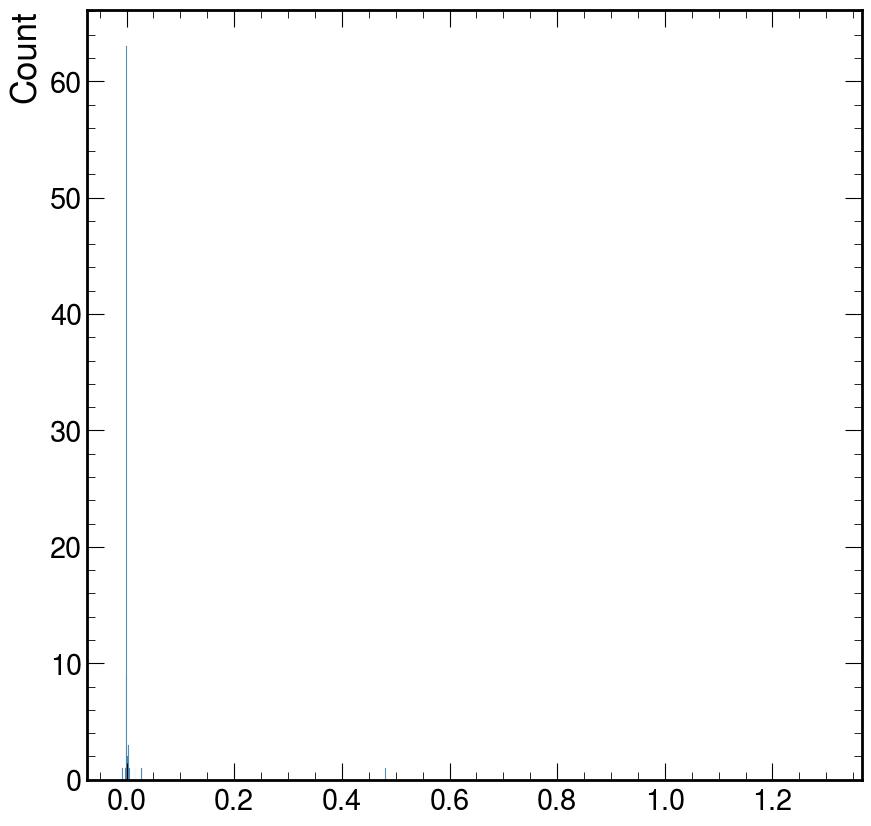

In [75]:
import seaborn as sns
sns.histplot(np.log(1/(2-e_over_rec)), binwidth=1e-3)



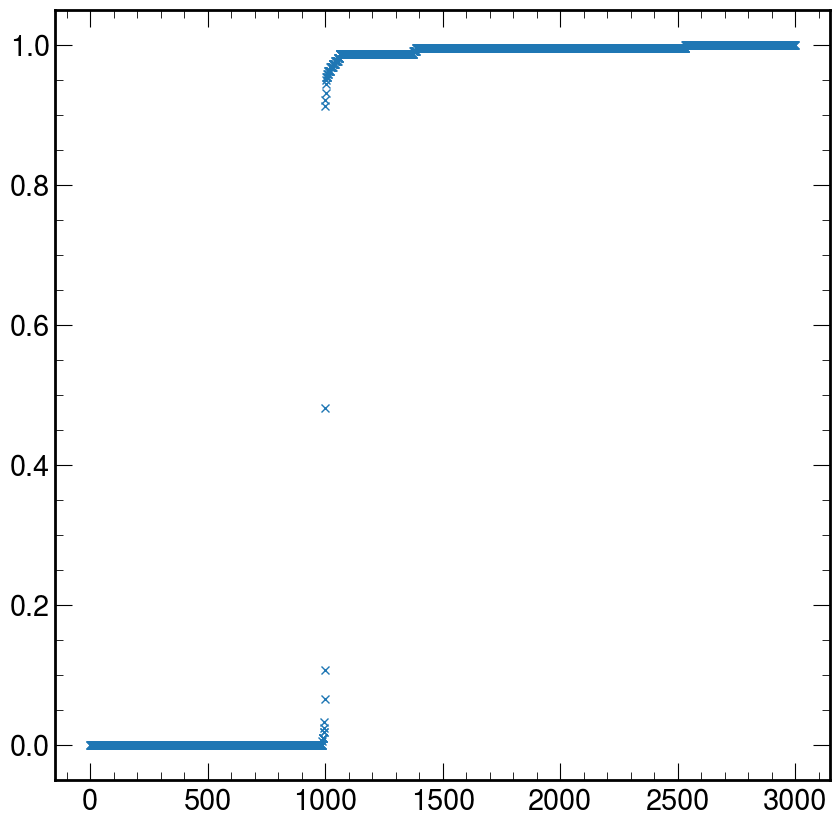

In [58]:
plt.plot(sums,'x')

In [ ]:
mean_predtored, variance_om_true_rec_ = obtain_MPV_and_68(
    e_over_rec, bins_per_binned_E
)
        

In [36]:
calibrated_list = []
reco_list = []

calibrated_list_pandora = []
reco_list_pandora = []
number_of_showers = len(sd["number_batch"].values)
counter_i = 0
counter_total = 0


In [41]:
sum_by = np.argmax(sd["number_batch"].values != sd["number_batch"].values[0])
temp_sd = sd[0:sum_by]
print(sum_by)
counter_total = counter_total + sum_by
total_e_event = np.nansum(temp_sd["true_showers_E"].values)
total_e_reco = np.nansum(temp_sd["reco_showers_E"].values)
total_e_ML_cali = np.nansum(temp_sd["calibrated_E"].values)
total_e_reco_ML = np.nansum(temp_sd["pred_showers_E"].values)
calibrated_list.append(total_e_ML_cali / total_e_event)
reco_list.append(total_e_reco_ML / total_e_reco)
sd = sd.drop(np.arange(0, sum_by))
counter_i = np.mod(counter_i + 1, 4)
sd = sd.reset_index(drop=True)
print("1", number_of_showers, counter_total, number_of_showers - counter_total)


11
1 56567 67 56500


In [34]:
sd[30:40]

,true_showers_E,reco_showers_E,pred_showers_E,e_pred_and_truth,pid,calibration_factor,calibrated_E,step,number_batch
2,11.554039,14.184406,14.430557,14.121136,130.0,1.0,14.430557,1.0,2.0
3,13.556046,12.767867,13.242009,12.756669,-211.0,1.0,13.242009,1.0,2.0
4,3.242230,4.713418,4.713418,4.713418,130.0,1.0,4.713418,1.0,2.0
5,1.162767,0.016989,NaN,NaN,2112.0,NaN,NaN,1.0,2.0
6,6.341386,5.835961,5.835961,5.835961,130.0,1.0,5.835961,1.0,2.0
7,21.758846,24.356871,22.630360,22.630358,-211.0,1.0,22.630360,1.0,2.0
8,40.874100,37.578533,37.649876,37.401062,-211.0,1.0,37.649876,1.0,2.0
9,17.924795,18.075304,18.059446,18.059443,11.0,1.0,18.059446,1.0,2.0
10,14.750260,18.270432,18.155445,17.977976,-2212.0,1.0,18.155445,1.0,2.0
11,4.563927,4.911805,4.911805,4.911805,22.0,1.0,4.911805,1.0,2.0


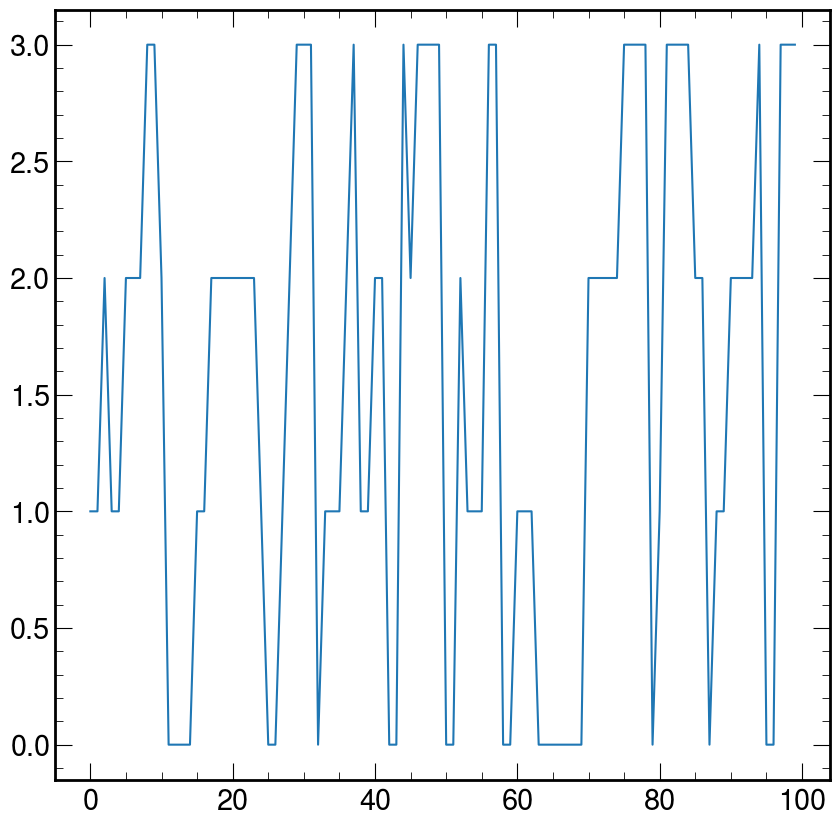

In [27]:
plt.plot(sd["number_batch"].values[0:100])